# Part I - WeatherPy 

### Background 
In this project, we will be analyzing data from the Openweathermap API in order to analyze the effect of latitude on different factors such as humidity, cloudiness, etc. The cities to be analyze will be generated randomly by randomizing different latitudes and gathering cities on those latitudes. 

Our first objective is to import our libraries, randomize our latitudes/longtitudes, and gather the cities we will be analyzing as well as their information in a Data Frame. 

In [1]:
#Part I - WeatherPy

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Import API key
try: 
    Path = '/Users/abdullahalmasri/Desktop/API_Challenge/config.py'
    import imp
    API_Key = imp.load_source('API_Key', Path)
    
except: 
    print("Change File Path to where Config File")

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

#Output File (PNG)
output_data_file1 = "output_data/LatitudevsMaxTemp.png"
output_data_file2 = "output_data/LatitudevsHumidity.png"
output_data_file3 = "output_data/LatitudevsCloudiness.png"
output_data_file4 = "output_data/LatitudevsWindspeed.png"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

### Task 1: Randomizing the Latitude and Longitude Combination & Getting our List of Cities. 

In [2]:
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)


### Task 2: Retrieving Our Data

In [3]:
print("Beginning Data Retrieval")
print("---------------------------")
print("")
n=0
n1 = 1 

#Defining the URL of the API 
url = 'http://api.openweathermap.org/data/2.5/weather?'
units = "imperial"

query_url = f"{url}appid={API_Key}&units={units}&q="

#Creating for loop to loop through the cities array 
#For each value, get the API and check if there is 
#an error or not. 
#If there isn't an error, print the record is being processed. 
for row in cities: 
    try: 
        response1 = requests.get(query_url + row)
        if response1.status_code == 404: 
            print("City not found. Skipping...")
            n=n-1
        else: 
            print(f"Processing Record {n} of Set {n1} | {row}")
        if n == 50: 
            n1 = n1+1 
            n=0     
        n=n+1    
    except: 
            print("Error")
            pass

print("-------------------------")
print("Data Retrieval Complete")
print("-------------------------")

Beginning Data Retrieval
---------------------------

Processing Record 0 of Set 1 | qaanaaq
Processing Record 1 of Set 1 | mutoko
City not found. Skipping...
Processing Record 2 of Set 1 | ancud
Processing Record 3 of Set 1 | tarauaca
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | longyearbyen
Processing Record 7 of Set 1 | baiyin
Processing Record 8 of Set 1 | clyde river
Processing Record 9 of Set 1 | kankipadu
Processing Record 10 of Set 1 | victoria
Processing Record 11 of Set 1 | souillac
City not found. Skipping...
Processing Record 12 of Set 1 | yellowknife
Processing Record 13 of Set 1 | fairview
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | ampanihy
Processing Record 16 of Set 1 | baykit
Processing Record 17 of Set 1 | qasigiannguit
Processing Record 18 of Set 1 | corner brook
Processing Record 19 of Set 1 | butaritari
Processing Record 20 of Set 1 | khatanga
Processing Record 21 of Set 

Processing Record 35 of Set 4 | port blair
Processing Record 36 of Set 4 | ziyang
Processing Record 37 of Set 4 | prince rupert
Processing Record 38 of Set 4 | kushima
City not found. Skipping...
Processing Record 39 of Set 4 | putina
Processing Record 40 of Set 4 | beringovskiy
City not found. Skipping...
City not found. Skipping...
Processing Record 41 of Set 4 | roebourne
Processing Record 42 of Set 4 | broome
Processing Record 43 of Set 4 | donnacona
Processing Record 44 of Set 4 | goya
Processing Record 45 of Set 4 | kenai
Processing Record 46 of Set 4 | villa bruzual
Processing Record 47 of Set 4 | coalville
Processing Record 48 of Set 4 | lehigh acres
Processing Record 49 of Set 4 | kaitangata
City not found. Skipping...
Processing Record 50 of Set 4 | castro
City not found. Skipping...
Processing Record 1 of Set 5 | sangar
Processing Record 2 of Set 5 | chase
Processing Record 3 of Set 5 | kirakira
Processing Record 4 of Set 5 | mtwara
Processing Record 5 of Set 5 | kavaratti
C

Processing Record 22 of Set 8 | yanacancha
Processing Record 23 of Set 8 | pangnirtung
Processing Record 24 of Set 8 | matara
Processing Record 25 of Set 8 | marzuq
Processing Record 26 of Set 8 | rawson
Processing Record 27 of Set 8 | sydney
Processing Record 28 of Set 8 | tessalit
Processing Record 29 of Set 8 | san quintin
Processing Record 30 of Set 8 | rochegda
Processing Record 31 of Set 8 | dunedin
Processing Record 32 of Set 8 | kualakapuas
Processing Record 33 of Set 8 | cabedelo
City not found. Skipping...
Processing Record 34 of Set 8 | berlevag
City not found. Skipping...
Processing Record 35 of Set 8 | greytown
Processing Record 36 of Set 8 | kodinar
Processing Record 37 of Set 8 | patitirion
Processing Record 38 of Set 8 | feldkirchen an der donau
Processing Record 39 of Set 8 | totma
Processing Record 40 of Set 8 | akonolinga
Processing Record 41 of Set 8 | rypefjord
Processing Record 42 of Set 8 | izumo
Processing Record 43 of Set 8 | sabang
Processing Record 44 of Set 

Processing Record 11 of Set 12 | pimenta bueno
City not found. Skipping...
Processing Record 12 of Set 12 | gravdal
Processing Record 13 of Set 12 | maracaju
Processing Record 14 of Set 12 | doha
Processing Record 15 of Set 12 | coahuayana
City not found. Skipping...
Processing Record 16 of Set 12 | mareeba
Processing Record 17 of Set 12 | buraydah
Processing Record 18 of Set 12 | gazimurskiy zavod
Processing Record 19 of Set 12 | tweed
Processing Record 20 of Set 12 | bollnas
Processing Record 21 of Set 12 | oktyabrskiy
Processing Record 22 of Set 12 | wanaka
Processing Record 23 of Set 12 | garowe
Processing Record 24 of Set 12 | perigueux
Processing Record 25 of Set 12 | dargaville
Processing Record 26 of Set 12 | ipanema
Processing Record 27 of Set 12 | goure
Processing Record 28 of Set 12 | nakskov
Processing Record 29 of Set 12 | araouane
-------------------------
Data Retrieval Complete
-------------------------


### Task 3: Converting our API to JSON and Extracting Needed Data to a Data Frame. 

In [4]:
#Defining empty arrays for a variety of variables 
json_response = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Long = []
Max_Temp = []
Wind_Speed = []
Cities1 = []
    

for city in cities:
    #Get API for each city again
    response = requests.get(query_url + city)
    if response.status_code != 404:
        #JSON the API 
        response_json = response.json()
        try: 
            #Extracting various data from API to different arrays 
            Cities1.append(response_json["name"])
            Cloudiness.append(response_json["clouds"]["all"])
            Country.append(response_json['sys']['country'])
            Date.append(response_json['dt'])
            Humidity.append(response_json['main']['humidity'])
            Lat.append(response_json['coord']['lat'])
            Long.append(response_json['coord']['lon'])
            Max_Temp.append(response_json['main']['temp_max'])
            Wind_Speed.append(response_json['wind']['speed'])

        except KeyError: 
            print("Error")
            pass

In [5]:
#Creating a dictionary for the arrays of interest
weather_dict = {
    "City": Cities1,
    "Cloudiness": Cloudiness,
    "Country" : Country, 
    "Date": Date,
    "Humidity":Humidity, 
    "Latitude":Lat, 
    "Longitude":Long, 
    "Max Temperature" : Max_Temp,
    "Wind Speed" : Wind_Speed
    
}

#Converting the dictionary to a data frame 
weather_df = pd.DataFrame(weather_dict)

In [6]:
#Showing the count of each array in the data frame 
weather_df.count()

City               580
Cloudiness         580
Country            580
Date               580
Humidity           580
Latitude           580
Longitude          580
Max Temperature    580
Wind Speed         580
dtype: int64

In [7]:
#Showing the head of the data frame of interest
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
0,Qaanaaq,0,GL,1584034966,47,77.48,-69.36,-17.32,5.75
1,Mutoko,68,ZW,1584034966,86,-17.40,32.23,68.36,5.73
2,Ancud,90,CL,1584034966,100,-41.87,-73.82,59.00,10.29
3,Tarauacá,15,BR,1584034806,37,-8.16,-70.77,98.96,1.41
4,Busselton,86,AU,1584034966,39,-33.65,115.33,66.00,17.11


In [8]:
#Converting the dataframe to a csv file
weather_df.to_csv(output_data_file, index=False, header=True)

### Task 4: Creating a scatter plot of 
        (1) Latitude vs. Max Temperature
        (2) Latitude vs. Humidity
        (3) Latitude vs. Cloudiness
        (4) Latitude vs. Wind Speed

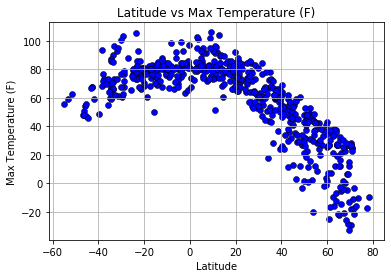

In [9]:
#Creating a scatter plot of the Latitude vs. Max Temperature 
plt.scatter(Lat,Max_Temp, color = 'b', linewidths=.5, edgecolors = 'k')
plt.title("Latitude vs Max Temperature (F)")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(b = True)

#Saving the figure to a PNG file 
plt.savefig(output_data_file1)

Observation: The code is analyzing the latitude of each city compared to it's maximum temperature. The higher the latitude, the lower the maximum temperature is the case for most cities. 

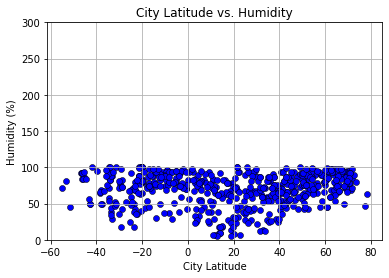

In [10]:
#Creating a scatter plot of the Latitude vs. Humidity 
plt.scatter(Lat,Humidity, color = 'b', linewidths=.5, edgecolors = 'k')
plt.title("City Latitude vs. Humidity")
plt.xlabel('City Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0,300)
plt.grid(b = True)

#Saving the figure to a PNG file
plt.savefig(output_data_file2)

Observation: The code is analyzing the latitude of each city compared to its humidity. 

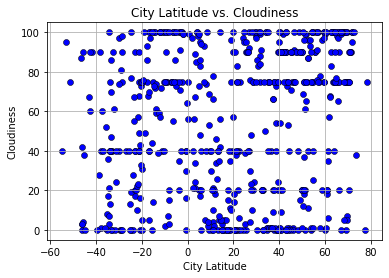

In [11]:
#Creating a scatter plot of the Latitude vs. Cloudiness 
plt.scatter(Lat,Cloudiness, color = 'b', linewidths=.5, edgecolors = 'k')
plt.title("City Latitude vs. Cloudiness")
plt.xlabel('City Latitude')
plt.ylabel('Cloudiness')
plt.grid(b = True)

#Saving the figure to a PNG file
plt.savefig(output_data_file3)

Observation: The code is analyzing the latitude of each city compared to the cloudiness of the city.

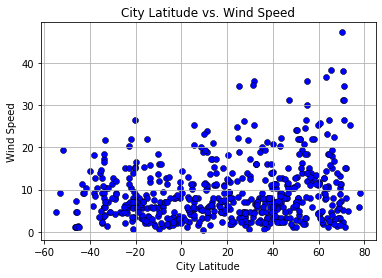

In [12]:
#Creating a scatter plot of the Latitude vs. Wind Speed
plt.scatter(Lat,Wind_Speed, color = 'b', linewidths=.5, edgecolors = 'k')
plt.title("City Latitude vs. Wind Speed")
plt.xlabel('City Latitude')
plt.ylabel('Wind Speed')
plt.grid(b = True)

#Saving the figure to a PNG file
plt.savefig(output_data_file4)

Observation: The code is analyzing the latitude of each city compared to it's wind speed. 

### Task 5: Split the Latitude Data into Northern and Southern Hemispheres

In [13]:
#Splitting the data into northern and southern hemisphere

Lat_north = []
Lat_south = []

Maxtemp_north = []
Maxtemp_south = [] 

Cloudiness_north = []
Cloudiness_south = []

Humidity_north = []
Humidity_south = [] 

Wind_speed_north = []
Wind_speed_south = []


for j in range(len(Lat)): 
    #Every latitude value above 0 we are defining as in the northern hemisphere
    if Lat[j] >= 0:
        #Filling the arrays of interest with the values we want 
        Lat_north.append(Lat[j])
        Maxtemp_north.append(Max_Temp[j])
        Humidity_north.append(Humidity[j])
        Wind_speed_north.append(Wind_Speed[j])
        Cloudiness_north.append(Cloudiness[j])

for j in range(len(Lat)): 
    #Every latitude value above 0 we are defining as in the southern hemisphere
    if Lat[j] <= 0:
        #Filling the arrays of interest with the values we want 
        Lat_south.append(Lat[j])
        Maxtemp_south.append(Max_Temp[j])
        Humidity_south.append(Humidity[j])
        Wind_speed_south.append(Wind_Speed[j])
        Cloudiness_south.append(Cloudiness[j])

### Task 6: Defining a Function to Plot the Linear Regression Given a X and a Y. 

In [14]:
#Defining a function that performs linear regression as we explained in class. 
def Linear_Regression(Xdata, Ydata): 
    vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(Xdata, Ydata)
    vc_fit = vc_slope * np.asarray(Xdata) + vc_int
    return print(f"The r-squared is: {vc_slope}"), plt.scatter(Xdata, Ydata), plt.plot(Xdata,vc_fit,"-",color = 'red'), plt.text(Xdata[-1+10],Ydata[20],f"y = {round(vc_slope,2)}x + {round(vc_int,2)}",color = "red", fontsize = 15)


### Task 7: Using the Function Above to Show the Linear Regression of 
            (1) Max Temp vs. Latitude Linear Regression
            (2) Humidity (%) vs. Latitude Linear Regression
            (3) Cloudiness (%) vs. Latitude Linear Regression
            (4) Wind Speed (mph) vs. Latitude Linear Regression
### For the Northern and Southern Hemisphere

The r-squared is: -1.2872618490061534


Text(0.5, 1.0, 'Northern Hemisphere - Max Temp vs. Latitude Linear Regression')

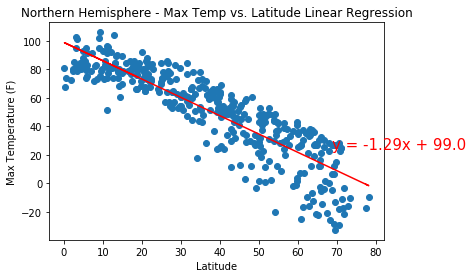

In [15]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Linear_Regression(Lat_north, Maxtemp_north)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')


The r-squared is: 0.45249836127696125


Text(0.5, 1.0, 'Southern Hemisphere - Max Temp vs. Latitude Linear Regression')

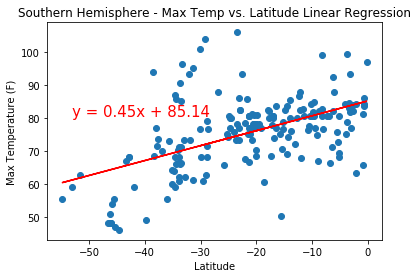

In [16]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Linear_Regression(Lat_south, Maxtemp_south)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')

Observation: In the northern hemisphere, there is a clear correlation between between the latitude and the maximum temperature. In the souther hemisphere, the correlation is less and the points vary, but there is still a correlation. 

The r-squared is: 0.41192225237728625


Text(0.5, 1.0, 'Northern Hemisphere - Humidity vs. Latitude Linear Regression')

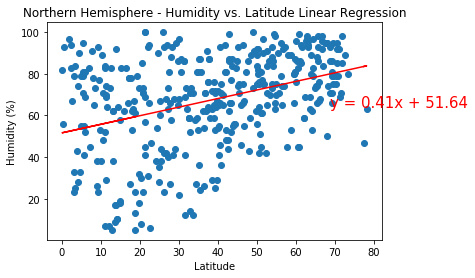

In [17]:
#  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Linear_Regression(Lat_north, Humidity_north)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')

The r-squared is: 0.12303705679220663


(0, 300)

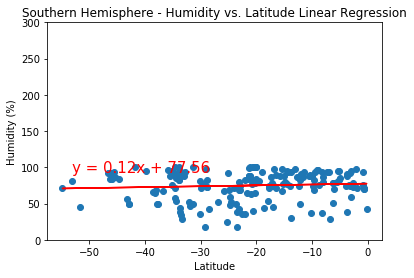

In [18]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Linear_Regression(Lat_south, Humidity_south)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression')
plt.ylim(0,300)

Observation: In the northern hemisphere, the data varies greatly. The higher the latitude, the closer the data points get to each other though. In the southern hemisphere, there is not a clear correlation either. 

The r-squared is: 0.5204165454535006


Text(0.5, 1.0, 'Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')

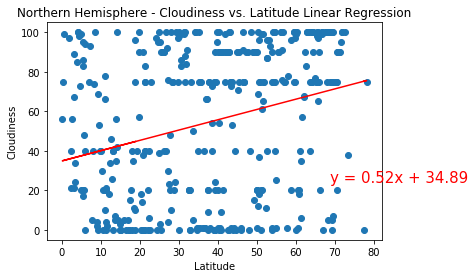

In [19]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Linear_Regression(Lat_north, Cloudiness_north)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')

The r-squared is: 0.7657397307696242


Text(0.5, 1.0, 'Southern Hemisphere - Cloudiness vs. Latitude Linear Regression')

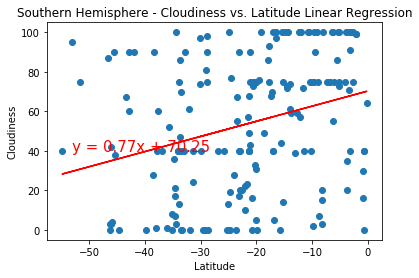

In [20]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Linear_Regression(Lat_south, Cloudiness_south)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression')

Observation: There does not seem to be much correlation between the latitude and the cloudiness and the correlation factor is very high at .52 in the northern hemisphere. In the southern hemisphere, the correlation and variety is even higher than for the northern hemisphere.

The r-squared is: 0.06879627578630321


Text(0.5, 1.0, 'Northern Hemisphere - Wind Speed vs. Latitude Linear Regression')

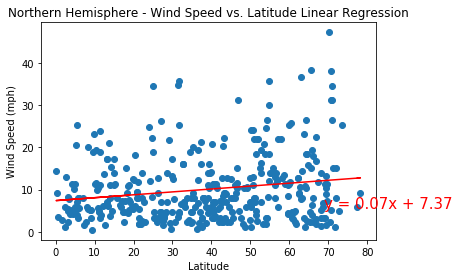

In [21]:
#Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Linear_Regression(Lat_north, Wind_speed_north)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression')

The r-squared is: -0.04894296331646403


Text(0.5, 1.0, 'Southern Hemisphere - Wind Speed vs. Latitude Linear Regression')

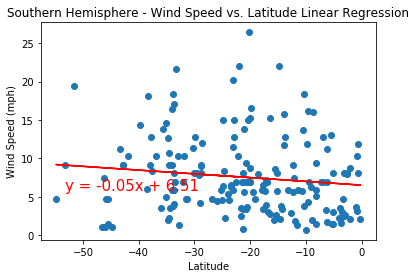

In [22]:
#Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Linear_Regression(Lat_south, Wind_speed_south)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression')

Observation: In the northern hemisphere, the higher the latitude the more outliers for wind speed. A correlation is hard to see. In the southern hemisphere, there are higher wind speeds in higher latitude areas. 